<a href="https://colab.research.google.com/github/anudeepk17/Lab7/blob/main/saccharide_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the file from your drive**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving saccharides_data_ARS.csv to saccharides_data_ARS (1).csv
User uploaded file "saccharides_data_ARS.csv" with length 39207 bytes


**Read The data**


In [ ]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['saccharides_data_ARS.csv'].decode('utf-8')))
data.head

<bound method NDFrame.head of        conc      R       G      B    G.1      Y     cR     cB saccharide
0         0  0.817   0.551 -0.752  0.496  0.410 -0.660  0.166   Fructose
1         0  1.022   0.953  1.561  1.042  0.888  0.267 -0.025   Fructose
2         0  0.017  -0.646 -1.564 -0.516 -0.473 -0.570  0.261   Fructose
3         0  0.247  -0.418 -1.000 -0.252 -0.248 -0.428  0.266   Fructose
4         0 -0.818  -1.921 -1.689 -1.522 -1.342 -0.112  0.426   Fructose
..      ...    ...     ...    ...    ...    ...    ...    ...        ...
635  100000 -2.020 -15.074 -0.557 -9.517 -8.162  4.328  4.790    Glucose
636  100000 -1.948 -14.037  2.432 -8.551 -7.342  5.356  4.155    Glucose
637  100000 -1.998 -14.527  0.507 -9.073 -7.788  4.647  4.509    Glucose
638  100000 -1.110 -12.533 -0.349 -7.712 -6.625  3.558  4.182    Glucose
639  100000 -1.524 -14.590 -0.141 -9.048 -7.759  4.317  4.783    Glucose

[640 rows x 9 columns]>

**Data Distribution**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fructose 352
Glucose 288


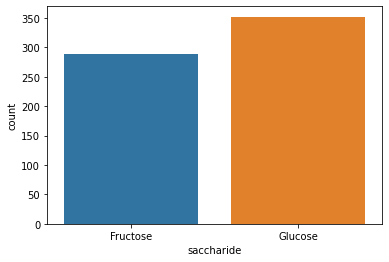

In [ ]:
import seaborn as sns
ax = sns.countplot(data['saccharide'], label='Count')
Fructose,Glucose = data['saccharide'].value_counts()
print('Fructose', Fructose)
print('Glucose', Glucose)

**Assign The Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = data.iloc[:, 1:8].values
saccharide = data.iloc[:, 8].values
conc = data.iloc[:,0].values


**Label Encode The data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(saccharide)

In [ ]:
saccharide

array(['Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructose',
       'Fructose', 'Fructose', 'Fructose', 'Fructose', 'Fructo

**This is the code for attaching the conc and Saccharide to a same matrix**

In [ ]:
labels=[]

i=0
while i<len(conc):
  label=[]
  label.append([conc[i]])
  label.append([y[i]])
  labels.append(label)
  i+=1

In [ ]:
labels_f=np.array(labels)

In [ ]:
labels_f.dtype

dtype('int64')

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
type(labels_f[0][0][0])

numpy.int64

**Define the testing and training data**

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, labels_f,test_size=0.15)
X_train.shape

(544, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [ ]:
np.shape(Y_train_2)

(2, 544, 1)

**Our neural network model**

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
def model():
  inputs = Input(shape=(7,))

  dense_1= Dense(32,activation='relu')(inputs)
  dense_2= Dense(32,activation='relu')(inputs)
  dense_2= Dense(32,activation='relu')(inputs)
  dense_2= Dense(32,activation='relu')(inputs)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='saccharide_out')(drop_1)
  output_2= Dense(1,activation="relu",name='conc_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model

In [ ]:
Model = model()

In [ ]:
Model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           256         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 32)           256         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32)           0           dense[0][0]                      
_______________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

**Saving our weights of the model**

In [ ]:
fle_s='saccharide.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
type(X_train[0])

numpy.ndarray

**Run the model**

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=512,validation_data=(X_test,Y_test_2),epochs=200,callbacks=[callback_list])

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 27326.4512 - saccharide_out_loss: 0.6783 - conc_out_loss: 27325.7734 - saccharide_out_accuracy: 0.4922 - conc_out_accuracy: 0.0527
Epoch 00001: val_loss improved from inf to 27566.66211, saving model to saccharide.h5
2/2 [==============================] - 0s 132ms/step - loss: 27239.7324 - saccharide_out_loss: 0.6803 - conc_out_loss: 27239.0508 - saccharide_out_accuracy: 0.4871 - conc_out_accuracy: 0.0551 - val_loss: 27566.6621 - val_saccharide_out_loss: 0.6206 - val_conc_out_loss: 27566.0410 - val_saccharide_out_accuracy: 0.5938 - val_conc_out_accuracy: 0.0833
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 27112.7754 - saccharide_out_loss: 0.6762 - conc_out_loss: 27112.0996 - saccharide_out_accuracy: 0.4805 - conc_out_accuracy: 0.0566
Epoch 00002: val_loss improved from 27566.66211 to 27566.65820, saving model to saccharide.h5
2/2 [==============================] - 0s 24ms/step - loss: 27239.7285 - 

**Evaluation of the model**

In [ ]:
scores = Model.evaluate(X_test,Y_test_2)

3/3 [==============================] - 0s 3ms/step - loss: 27546.1719 - saccharide_out_loss: 0.5110 - conc_out_loss: 27545.6621 - saccharide_out_accuracy: 0.6354 - conc_out_accuracy: 0.0000e+00


In [ ]:
pred=Model.predict(X_test)

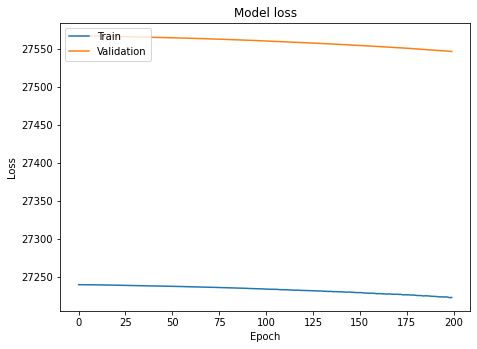

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

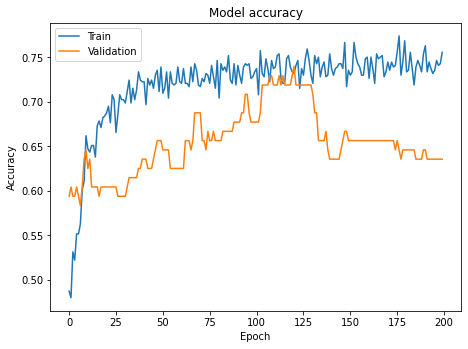

In [ ]:
plt.plot(History.history['saccharide_out_accuracy'])
plt.plot(History.history['val_saccharide_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25, wspace=0.35)

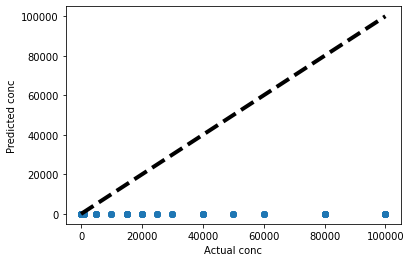

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual conc')
ax.set_ylabel('Predicted conc')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [ ]:
report=classification_report(Y_test_2[0], Pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.78      0.83      0.81        48

    accuracy                           0.80        96
   macro avg       0.80      0.80      0.80        96
weighted avg       0.80      0.80      0.80        96



In [ ]:
results = confusion_matrix(Y_test_2[0], Pred_l)

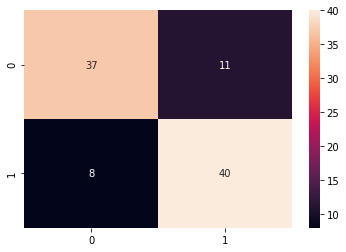

In [ ]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [ ]:
X_test[1]

array([-1.60926909, -1.56709029,  1.27244599, -1.57591191, -1.58013793,
        1.54210557,  1.39969855])

In [ ]:
Y_test[1]

array([[40000],
       [    0]])

In [ ]:
def test(ind,X,Model):
  pred_1=Model.predict(np.array([ind]))
  #print(pred_1)
  saccharide_f=['Fructose','Glucose']
  conc=int(np.round(pred_1[1][0]))
  saccharide=int(np.round(pred_1[0][0]))
  print("Predicted Concentration: "+ str(conc))
  print("Predicted Saccharide: "+ saccharide_f[saccharide])

In [ ]:
test([ 0.63773415,  0.61646654, -0.34247125,  0.62652922,  0.63855111,
       -0.5029677 , -0.5534424 ],X,Model)

Predicted Concentration: 17
Predicted Saccharide: Glucose
